#Подключение библиотек и загрузка данных

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
data = pd.read_csv('https://video.ittensive.com/python-advanced/marathon-data.csv')
data.head

<bound method NDFrame.head of        age gender     split     final
0       33      M  01:05:38  02:08:51
1       32      M  01:06:26  02:09:28
2       31      M  01:06:49  02:10:42
3       38      M  01:06:16  02:13:45
4       31      M  01:06:32  02:13:59
...    ...    ...       ...       ...
37245   18      M  04:24:24  09:32:57
37246   36      M  04:35:43  09:33:28
37247   51      M  04:22:35  09:33:40
37248   55      W  04:58:06  10:00:40
37249   58      W  04:59:49  10:01:08

[37250 rows x 4 columns]>

#Приводим время половины и полной дистанции к секундам.
для этого создаём дополнительные колонки split_sec и final_sek


In [14]:
data["split_sec"] = data["split"].apply(lambda x:((int(x.split(":")[0])*3600)+((int(x.split(":")[1])*60))+((int(x.split(":")[2])*1))))# в столбще округ оставим только первое слово
data["final_sec"] = data["final"].apply(lambda x:((int(x.split(":")[0])*3600)+((int(x.split(":")[1])*60))+((int(x.split(":")[2])*1))))# в столбще округ оставим только первое слово
data.head

<bound method NDFrame.head of        age gender     split     final  split_sec  final_sec
0       33      M  01:05:38  02:08:51       3938       7731
1       32      M  01:06:26  02:09:28       3986       7768
2       31      M  01:06:49  02:10:42       4009       7842
3       38      M  01:06:16  02:13:45       3976       8025
4       31      M  01:06:32  02:13:59       3992       8039
...    ...    ...       ...       ...        ...        ...
37245   18      M  04:24:24  09:32:57      15864      34377
37246   36      M  04:35:43  09:33:28      16543      34408
37247   51      M  04:22:35  09:33:40      15755      34420
37248   55      W  04:58:06  10:00:40      17886      36040
37249   58      W  04:59:49  10:01:08      17989      36068

[37250 rows x 6 columns]>

#Находим данные каких серии данных коррелируют (используя диаграмму pairplot в Seaborn).

Для этого создадим отдельный датафрейм data1 cо столбцами"split_sec", "final_sec"

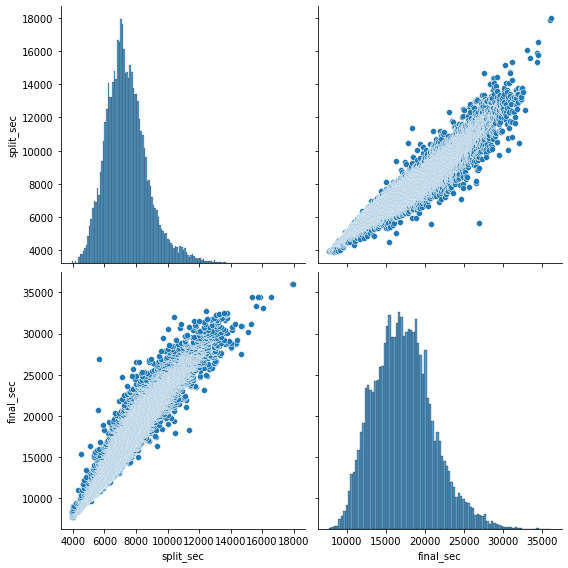

In [11]:
data1 = pd.DataFrame(data, columns=["split_sec", "final_sec"])
sns.pairplot(data1, height=4)
plt.show()

#Находим коэффициент корреляции этих серий данных, используя scipy.stats.pearsonr.

In [5]:
print (round(stats.pearsonr(data["split_sec"], data["final_sec"])[0], 2))

0.96


#Построим график jointplot для коррелирующих данных.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


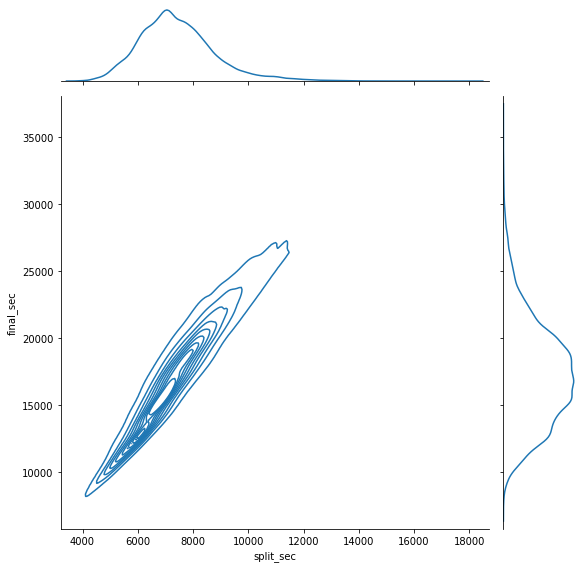

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


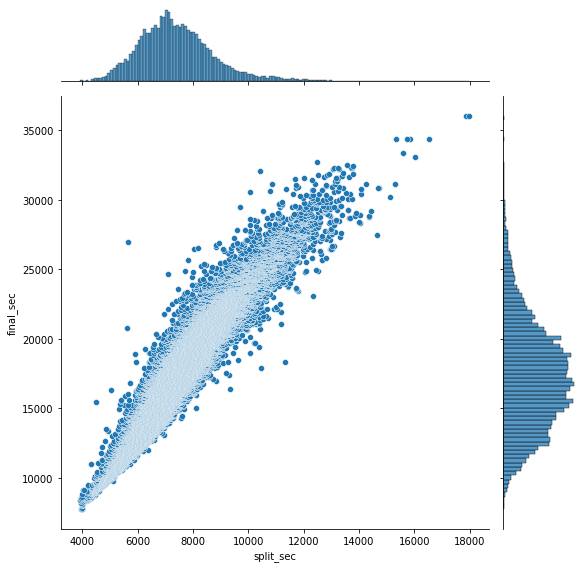

In [8]:
sns.jointplot("split_sec", "final_sec", data, height=8, kind="kde")# используем изолинии kind="kde"
plt.show()
sns.jointplot("split_sec", "final_sec", data, height=8)
plt.show()